In [1]:
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
import pandas
from imblearn.over_sampling import SMOTE
import scipy.io
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
# data loading
data = scipy.io.loadmat('x.mat')  
columns = np.asarray([['Electrode %d - %d/2 Hz'%(i+1, j+1)] for i in range(data['x'].shape[1]) for j in range(data['x'].shape[2])])
data['x'].shape
labels = pd.read_csv("table_withlabels.csv")
foof = pd.read_csv("foof2features.csv")
beh = pd.read_csv("behaviorals.csv")
df = pd.DataFrame(data['x'].reshape((data['x'].shape[0], -1)))
df.columns = columns
df['IDs'] = foof['C1']
df = pd.merge(df, labels[['label', 'IDs']], on='IDs', how='inner')
print(df['label'].value_counts())
dataset = df.values
print(dataset.shape)

Other Neurodevelopmental Disorders    492
ADHD-Inattentive Type                 388
ADHD-Combined Type                    376
Anxiety Disorders                     241
No Diagnosis Given                    203
Depressive Disorders                   85
Name: label, dtype: int64
(1785, 8297)


In [3]:
X = dataset[:,0:8295].astype(int) #bez 8295
y = dataset[:,8296]

y


array(['No Diagnosis Given', 'ADHD-Combined Type', 'ADHD-Combined Type',
       ..., 'Other Neurodevelopmental Disorders', 'ADHD-Inattentive Type',
       'ADHD-Inattentive Type'], dtype=object)

In [6]:
from sklearn.decomposition import PCA
# dimensionality reduction
pca = PCA(.90) # 95% variance retained
pca.fit(X)

# transform data
X = pca.transform(X)
X.shape

(1785, 119)

In [16]:

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(y)

In [17]:


# split into train and test
n_train = 1400
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)


(1400, 119) (385, 119)


Train on 1400 samples, validate on 385 samples
Epoch 1/200
1400/1400 [==============================] - 0s 142us/step - loss: 1.9099 - accuracy: 0.1650 - val_loss: 1.7753 - val_accuracy: 0.2468
Epoch 2/200
1400/1400 [==============================] - 0s 72us/step - loss: 1.7536 - accuracy: 0.2357 - val_loss: 1.7230 - val_accuracy: 0.2519
Epoch 3/200
1400/1400 [==============================] - 0s 71us/step - loss: 1.6989 - accuracy: 0.2843 - val_loss: 1.7056 - val_accuracy: 0.2442
Epoch 4/200
1400/1400 [==============================] - 0s 70us/step - loss: 1.6667 - accuracy: 0.3007 - val_loss: 1.6988 - val_accuracy: 0.2519
Epoch 5/200
1400/1400 [==============================] - 0s 71us/step - loss: 1.6455 - accuracy: 0.3064 - val_loss: 1.6946 - val_accuracy: 0.2338
Epoch 6/200
1400/1400 [==============================] - 0s 72us/step - loss: 1.6284 - accuracy: 0.3143 - val_loss: 1.6939 - val_accuracy: 0.2416
Epoch 7/200
1400/1400 [==============================] - 0s 71us/step - loss

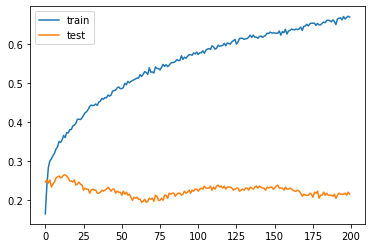

In [22]:
# define model
model = Sequential()
model.add(Dense(8, input_dim=119,kernel_initializer='he_uniform'))
model.add(Dense(25, input_dim=20, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# learning curves of model accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()